In [1]:

!pip install nilearn

     |████████████████████████████████| 2.5MB 3.1MB/s eta 0:00:01
     |████████████████████████████████| 3.3MB 23.3MB/s eta 0:00:01
     |████████████████████████████████| 296kB 33.4MB/s eta 0:00:01
     |████████████████████████████████| 7.1MB 34.2MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=1b8eea029bb57956abd5695df88eb039adae102c18384a3482d82e24b75127fb
  Stored in directory: /home/stud/a/abhpul18/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [1]:
#Loading modules
import os 
import sys
import numpy as np
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import nibabel as nib
#import plotting functions
from nilearn.plotting import view_img, plot_anat

In [2]:
"""#example images. Make sure to path to folder
IMG_BASE_PATH = os.path.dirname(os.path.abspath("Lab.ipynb"))
example_brain1 = nib.load('/home/stud1/a/aimkha18/Thesis/raw/'+ '/s123_S_0106-0004-02001-000081.nii')
example_brain3 = nib.load('/home/stud1/a/aimkha18/Thesis/raw/'+ '/s129_S_4422-0001-00001-000001.nii')""""

SyntaxError: EOL while scanning string literal (<ipython-input-2-e52ee75b6522>, line 4)

In [7]:

#display brains
plot_anat(example_brain1, draw_cross=False, display_mode ="xz")
plot_anat(example_brain1, draw_cross=False, display_mode ="z")
plot_anat(example_brain3, draw_cross=False, display_mode ="x")

NameError: name 'example_brain1' is not defined

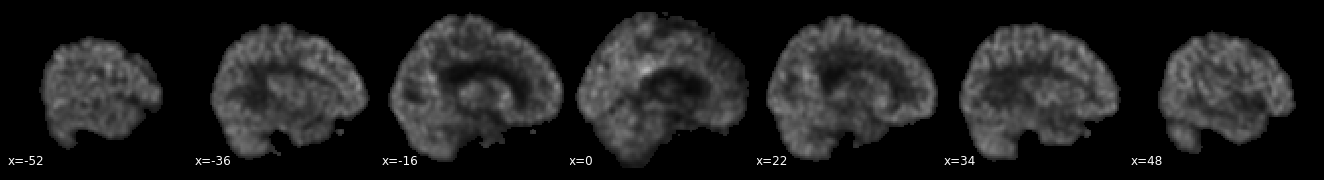

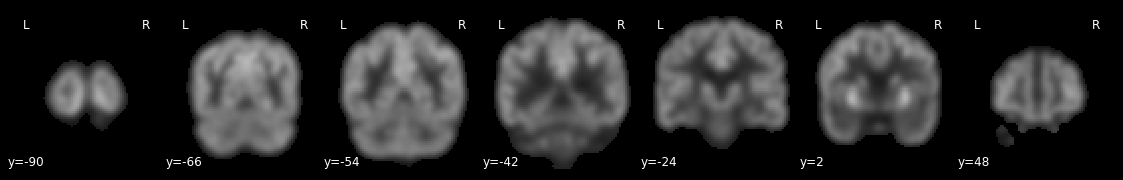

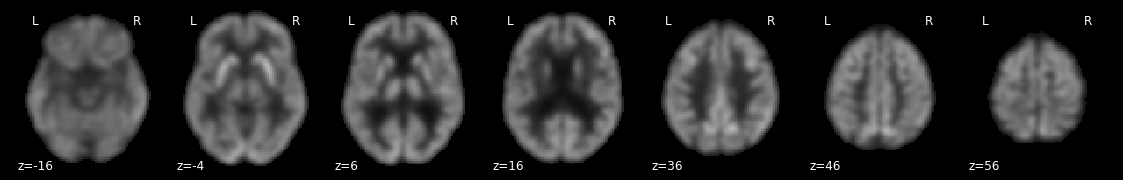

In [4]:
IMG_BASE_PATH = os.path.dirname(os.path.abspath("Thesis.ipynb"))
example_brain1_norm = nib.load('C:/Users/aimkha18/Documents/Normal_final/' + '/iws002_S_0295-0001-00001-000001.nii')
example_brain2_norm = nib.load('C:/Users/aimkha18/Documents/Normal_final/' + '/iws002_S_1280-0004-00004-000001.nii')
example_brain3_norm = nib.load('C:/Users/aimkha18/Documents/Normal_final/' +'/iws002_S_1261-0004-00004-000001.nii')

plot_anat(example_brain1_norm, draw_cross=False, display_mode ="x")
plot_anat(example_brain2_norm, draw_cross=False, display_mode ="y")
plot_anat(example_brain3_norm, draw_cross=False, display_mode ="z")


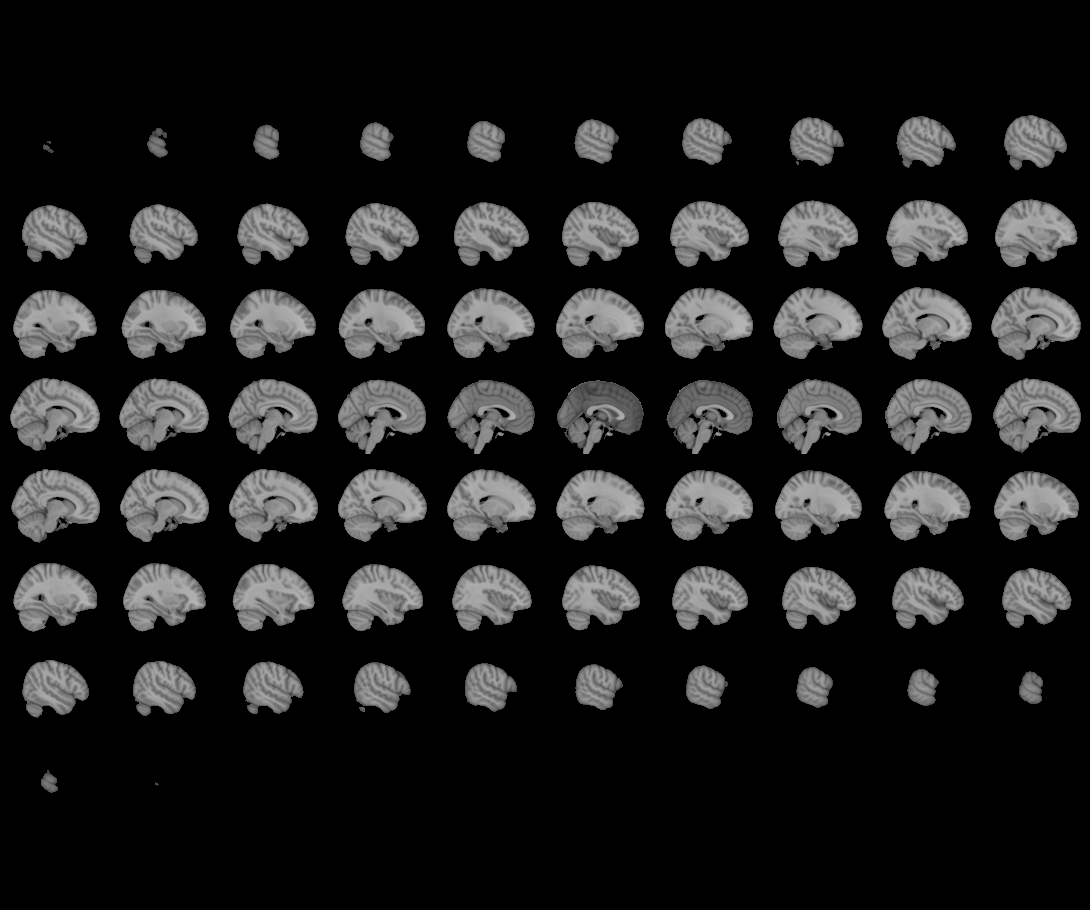
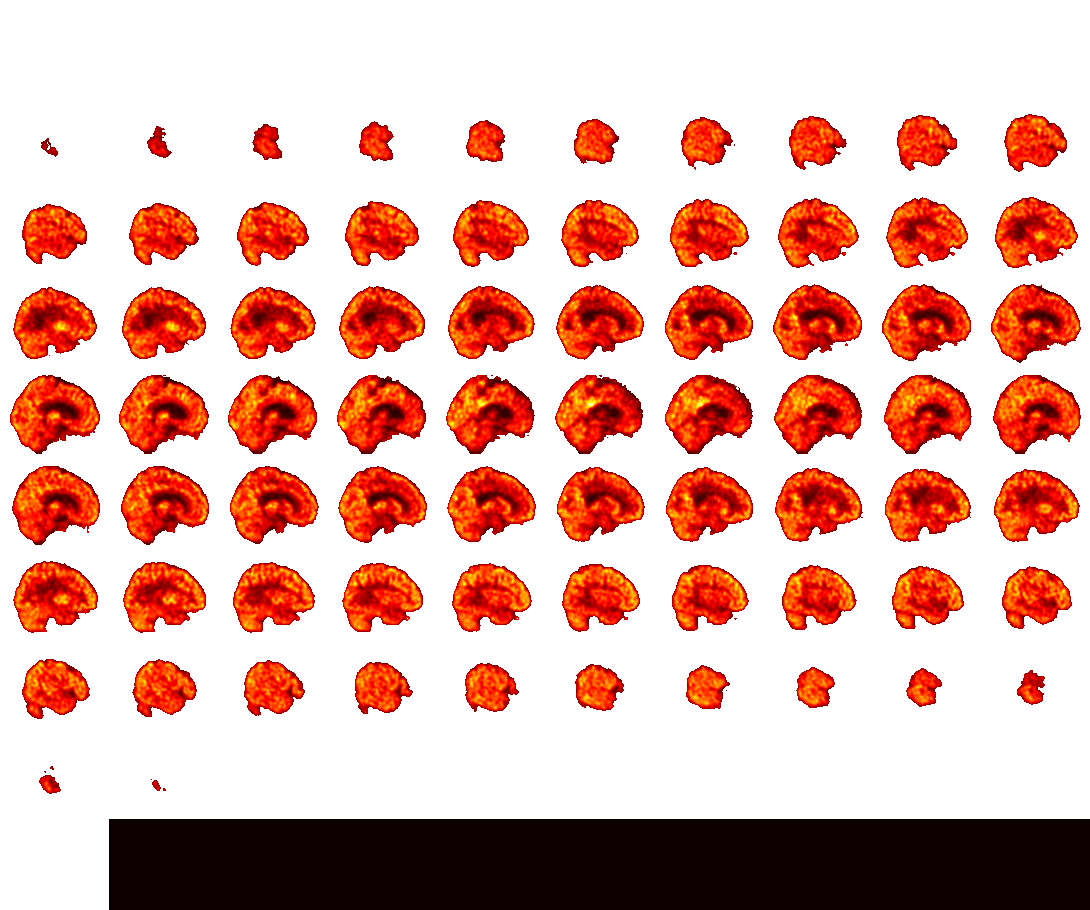

In [5]:
view_img(example_brain1_norm)

In [3]:
#Loading function
def load_all_nii_data(path,filenames):
    data=[]
    temp=[]
    for i in range(0,len(filenames)):
        temp=nib.load(path+filenames[i])
        temp=temp.get_fdata()
        if i == 0:
            data=np.expand_dims(temp,0)
        else:
            data=np.append(data,np.expand_dims(temp,0),0)
    print('Data shape '+str(data.shape))
    return data,filenames

In [4]:
#load healthy and ill brains
IMG_BASE_PATH = os.path.dirname(os.path.abspath("Thesis.ipynb"))
adni_files_normal = os.listdir('/home/stud1/a/abhpul18/Thesis/normal_final/')
adni_files_ill = os.listdir('/home/stud1/a/abhpul18/Thesis/ad_final/')
adni_data_normal, normal_names = load_all_nii_data('/home/stud1/a/abhpul18/Thesis/normal_final/',adni_files_normal)
adni_data_ill, ill_names = load_all_nii_data('/home/stud1/a/abhpul18/Thesis/ad_final/',adni_files_ill)

#concatenate into single array
all_data = np.concatenate((adni_data_normal, adni_data_ill))
all_data.shape[0]

Data shape (347, 79, 95, 79)
Data shape (339, 79, 95, 79)


686

In [5]:
#Normalize image brightness for each image via a for loop
#The first index is the image index
def min_max_norm(x): # x is a single image
    #find miminum value
    min = np.min(x)
    #find maximum value
    max = np.max(x)
    range = max - min
    y =[(a - min) / range for a in x]  
    #returning value
    return y    
   

In [6]:
#normalize
for i in range(0,all_data.shape[0]):
    #use function   

    all_data[i,:,:,:]=min_max_norm(all_data[i])

In [7]:
#placeholder array
labels= np.zeros(all_data.shape[0])
#we know that the sick brains come after the normal ones since we just concatenated the health with the sick brains
#But your code in the bracket[]
labels[347:686] = 1

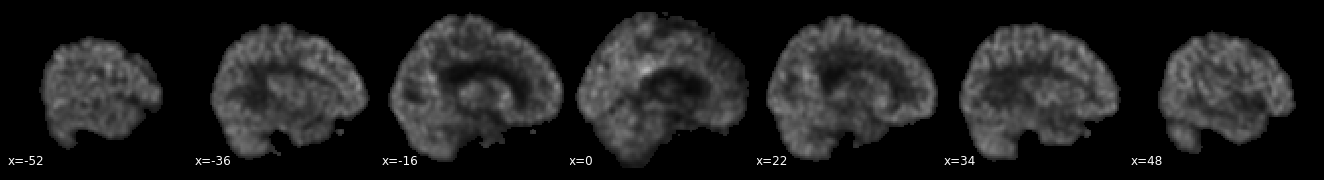

In [4]:
example_brain1_norm = nib.load('/home/stud1/a/abhpul18/Thesis/normal_final/' + '/iws002_S_0295-0001-00001-000001.nii')
#example_brain2_norm = nib.load('/home/stud1/a/aimkha18/Thesis/Normal_final/' + '/iws002_S_1280-0004-00004-000001.nii')
#example_brain3_norm = nib.load('/home/stud1/a/aimkha18/Thesis/Normal_final/' +'/iws002_S_1261-0004-00004-000001.nii')

plot_anat(example_brain1_norm, draw_cross=False, display_mode ="x")
#plot_anat(example_brain2_norm, draw_cross=False, display_mode ="y")
#plot_anat(example_brain3_norm, draw_cross=False, display_mode ="z")

In [8]:
all_data[1].shape

(79, 95, 79)

In [9]:
all_data[1]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [10]:
nchannels = 3
width = 79
length = 95
depth = 79
img = all_data


In [11]:
print(img.shape)

(686, 79, 95, 79)


In [12]:
rgb_batch1 = np.repeat(img[..., np.newaxis], 3, -1)

In [13]:
print(rgb_batch1.shape)

(686, 79, 95, 79, 3)


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv3D, MaxPool3D
from keras import optimizers
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import StratifiedKFold, train_test_split
print(tf.__version__)
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score

2.1.0


Using TensorFlow backend.


In [5]:
example_brain1_norm.shape
example_brain1_norm = example_brain1_norm.get_fdata()


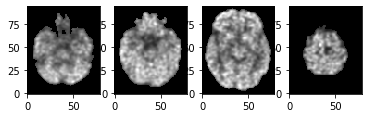

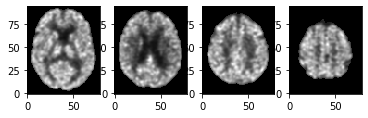

In [6]:
import matplotlib.pyplot as plt
def show_slices(slices):
    """ Function to display row of image slices """
    fig, axes = plt.subplots(1, len(slices))
    for i, slice in enumerate(slices):
        axes[i].imshow(slice.T, cmap="gray", origin="lower")

slice_0 = example_brain1_norm[:, :, 20]
slice_1 = example_brain1_norm[:, :, 23]
slice_2 = example_brain1_norm[:, :, 31]
slice_3 = example_brain1_norm[:, :, 39]
slice_4 = example_brain1_norm[:, :, 47]
slice_5 = example_brain1_norm[:, :, 55]
slice_6 = example_brain1_norm[:, :, 63]
slice_7= example_brain1_norm[:, :, 68]

show_slices([slice_0, slice_1, slice_2, slice_7])
show_slices([slice_3, slice_4, slice_5, slice_6])

In [7]:
from PIL import Image

def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst
a =get_concat_h(slice_1, slice_2)


AttributeError: 'numpy.ndarray' object has no attribute 'width'

In [15]:
all_data[1].shape

(79, 95, 79)

In [16]:
nchannels = 3
width = 79
length = 95
depth = 79
img = all_data[1]

In [17]:
rgb_batch= np.repeat(img[..., np.newaxis], 3, -1)
rgb_batch.shape

(79, 95, 79, 3)

In [18]:
def baseline_model():
    # create model 
    model = Sequential() 
    model.add(Conv3D(filters = 32, kernel_size = (5,5, 5),padding = 'Same', 
                 activation ='relu', input_shape = (rgb_batch.shape)))
    model.add(Conv3D(filters = 32, kernel_size = (2,2,2),padding = 'Same', 
                 activation ='relu'))
    model.add(Conv3D(filters = 32, kernel_size = (2,2,2),padding = 'Same', 
                 activation ='relu'))

    model.add(MaxPool3D(pool_size=(2,2,2)))
    model.add(Dropout(0.6))
    model.add(MaxPool3D(pool_size=(2,2,2)))
    
    model.add(Flatten())
    model.add(Dense(130, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation = "softmax"))
    model.summary() 
    # Compile model 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model
# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*3 -> MaxPool2D*2 -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out


#model = Sequential()




In [19]:
rgb_batch1.shape


(686, 79, 95, 79, 3)

In [20]:
labels.shape

(686,)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(rgb_batch1, labels, test_size=0.2)

In [30]:
#optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [22]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=3, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=2, shuffle=True)
results = cross_val_score(estimator, rgb_batch1, labels, cv=kfold)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 79, 95, 79, 32)    12032     
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 79, 95, 79, 32)    8224      
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 79, 95, 79, 32)    8224      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 39, 47, 39, 32)    0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 39, 47, 39, 32)    0         
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 19, 23, 19, 32)    0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 265696)           

In [23]:
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))
print (results)

Accuracy: 49.42% (0.15%)
[0.49271137 0.49562684]


In [25]:
#model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

In [26]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.003)

In [27]:
#epochs = 3 # Turn epochs to 30 to get 0.9967 accuracy
#batch_size = 5

In [28]:
# Without data augmentation i obtained an accuracy of 0.98114
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_test, y_test), verbose = 2)

Train on 548 samples, validate on 138 samples
Epoch 1/9
 - 1211s - loss: 7.6107 - accuracy: 0.5036 - val_loss: 8.2876 - val_accuracy: 0.4565
Epoch 2/9
 - 1210s - loss: 7.6107 - accuracy: 0.5036 - val_loss: 8.2876 - val_accuracy: 0.4565
Epoch 3/9
 - 1210s - loss: 7.6107 - accuracy: 0.5036 - val_loss: 8.2876 - val_accuracy: 0.4565
Epoch 4/9
 - 1208s - loss: 7.6107 - accuracy: 0.5036 - val_loss: 8.2876 - val_accuracy: 0.4565
Epoch 5/9
 - 1208s - loss: 7.6107 - accuracy: 0.5036 - val_loss: 8.2876 - val_accuracy: 0.4565
Epoch 6/9


KeyboardInterrupt: 